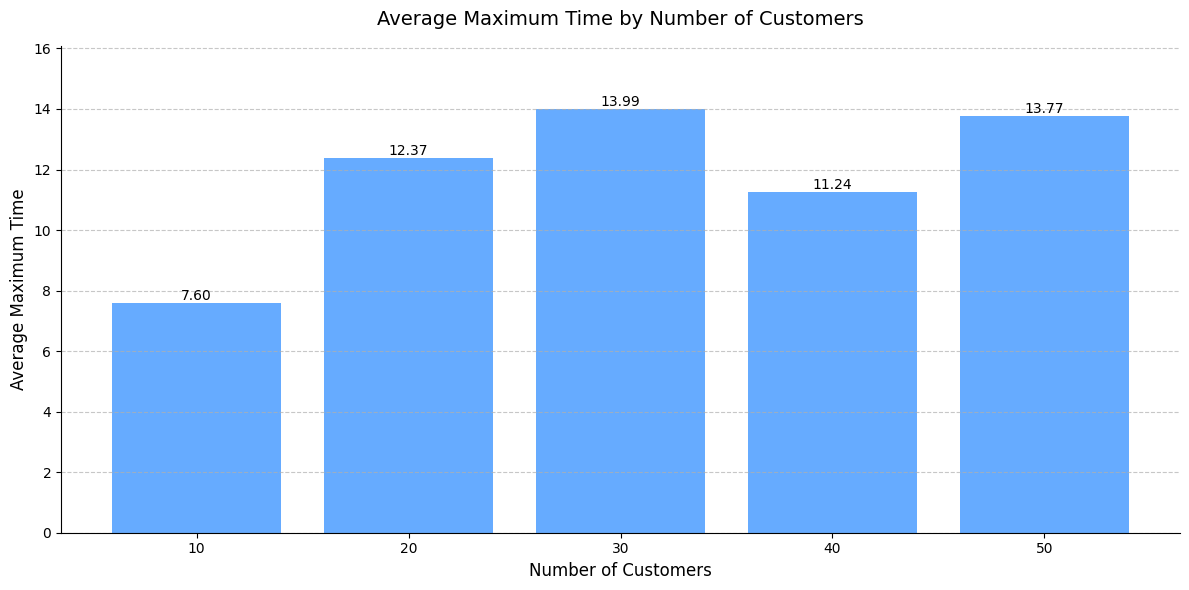

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('../results/greedy_summary_20241103_165350.csv')

# Group by number of customers and calculate mean max_time
avg_times = df.groupby('num_customers')['max_time'].mean().reset_index()

# Create the plot with specific dimensions
plt.figure(figsize=(12, 6))

# Create bars
bars = plt.bar(avg_times['num_customers'], avg_times['max_time'], 
               width=8, color='#4096ff', alpha=0.8)

# Customize the plot
plt.title('Average Maximum Time by Number of Customers', fontsize=14, pad=15)
plt.xlabel('Number of Customers', fontsize=12)
plt.ylabel('Average Maximum Time', fontsize=12)

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7, axis='y')

# Customize axis
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

# Set y-axis limits
max_time = avg_times['max_time'].max()
plt.ylim(0, max_time * 1.15)  # Add 15% padding on top

# Add hover effect (optional, needs to be run in a Jupyter notebook)
def hover(event):
    if event.inaxes == plt.gca():
        for bar in bars:
            contains, _ = bar.contains(event)
            bar.set_alpha(0.5 if contains else 0.8)
        plt.draw()

plt.gcf().canvas.mpl_connect('motion_notify_event', hover)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()